In [1]:
%pylab inline
import sys; sys.path.insert(0, "../")
import numpy as np
import time
from emcee.autocorr import *
from ensemble_sampler import *

import seaborn as sns
from pandas import DataFrame

Populating the interactive namespace from numpy and matplotlib


### Example of sampling from Rosenbrock density  
$f(x_1, x_2) \propto \exp(-[a(x_2 - x_1^2)^2 + (1-x_1)^2]\ / \ b)$  

In [2]:
dim = 2
nwalkers = 4
batch_size = 1
niters = 100000
t_dist = Rosenbrock()

##### Not using ensemble, use isotropic gaussian proposal with scale=0.2

In [3]:
proposal = PCNWalkMove(s=None, scale=0.2)
sampler = Sampler(dim=dim, t_dist=t_dist, proposal=proposal, nwalkers=nwalkers)
sampler.run_mcmc(niters, batch_size=batch_size, random_start=True, store=True)

The chain is too short to reliably estimate the autocorrelation time


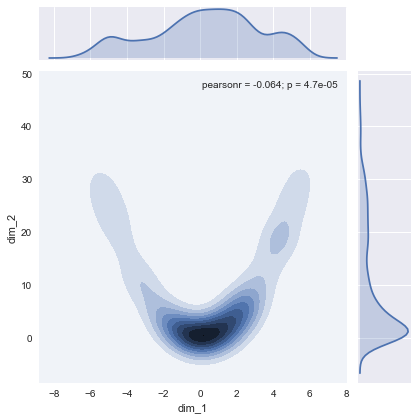

In [4]:
chain = sampler.history.get_flat('chain')
try:
    print sampler.auto_corr()
except AutocorrError, err:
    print err
    
x, y = ['dim_1', 'dim_2']
df = DataFrame(np.vstack([chain[::100, 0], chain[::100, 1]]).T, columns=[x, y])
sns.jointplot(x=x, y=y, data=df, kind='kde')

#### Use ensemble of size 3, scale=0.2.

In [5]:
proposal = PCNWalkMove(s=3, scale=0.2)
sampler = Sampler(dim=dim, t_dist=t_dist, proposal=proposal, nwalkers=nwalkers)
sampler.run_mcmc(niters, batch_size=batch_size, random_start=True, store=True)

The chain is too short to reliably estimate the autocorrelation time


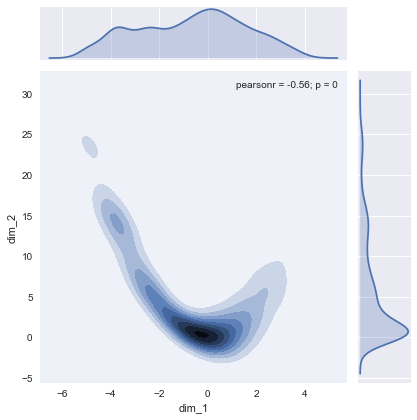

In [6]:
chain = sampler._history.get_flat('chain')
try:
    print sampler.auto_corr()
except AutocorrError, err:
    print err
    
x, y = ['dim_1', 'dim_2']
df = DataFrame(np.vstack([chain[::100, 0], chain[::100, 1]]).T, columns=[x, y])
sns.jointplot(x=x, y=y, data=df, kind='kde')

### Stretch 

In [8]:
proposal = StretchMove(a=2.0)

sampler = Sampler(dim=dim, t_dist=t_dist, proposal=proposal, nwalkers=nwalkers)
sampler.run_mcmc(niters, random_start=True, store=True)

chain = sampler._history.get_flat('chain')

The chain is too short to reliably estimate the autocorrelation time


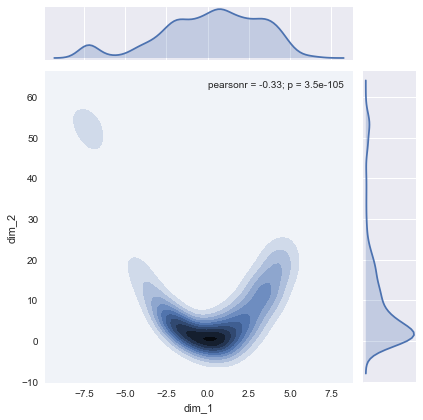

In [9]:
try:
    print sampler.auto_corr()
except AutocorrError, err:
    print err
    
x, y = ['dim_1', 'dim_2']
df = DataFrame(np.vstack([chain[::100, 0], chain[::100, 1]]).T, columns=[x, y])
sns.jointplot(x=x, y=y, data=df, kind='kde')

### Stretch emcee

In [10]:
import emcee

class Rosenbrock(object):
    def __init__(self):
        self.a1 = 100.0
        self.a2 = 20.0

    def __call__(self, p):
        return -(self.a1 * (p[1] - p[0] ** 2) ** 2 + (1 - p[0]) ** 2) / self.a2
    
p0 = np.random.rand(nwalkers * dim).reshape(nwalkers, dim)
sampler = emcee.EnsembleSampler(nwalkers, dim, Rosenbrock())
hist = sampler.run_mcmc(p0, N=niters)

The chain is too short to reliably estimate the autocorrelation time


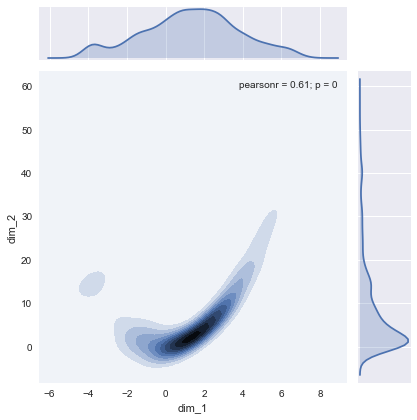

In [11]:
try:
    print sampler.acor
except AutocorrError, err:
    print err
    
chain = sampler.flatchain
x, y = ['dim_1', 'dim_2']
df = DataFrame(np.vstack([chain[::100, 0], chain[::100, 1]]).T, columns=[x, y])
sns.jointplot(x=x, y=y, data=df, kind='kde')

#### Ensemble with pCN, beta=0.3  

In [3]:
proposal = PCNWalkMove(s=3, beta=0.3)

sampler = Sampler(dim=dim, t_dist=t_dist, proposal=proposal, nwalkers=nwalkers)
sampler.run_mcmc(niters, batch_size=batch_size, random_start=True, store=True)

[ 65.88802043  50.29107396]


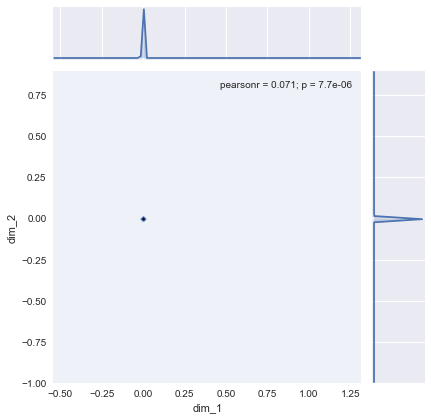

In [4]:
chain = sampler.history.get_flat('chain')
try:
    print sampler.auto_corr()
except AutocorrError, err:
    print err
    
x, y = ['dim_1', 'dim_2']
df = DataFrame(np.vstack([chain[::100, 0], chain[::100, 1]]).T, columns=[x, y])
sns.jointplot(x=x, y=y, data=df, kind='kde')

#### Ensemble with pCN, more walkers.

In [14]:
nwalkers = 100

proposal = PCNWalkMove(s=None, scale=0.3)
sampler = Sampler(dim=dim, t_dist=t_dist, proposal=proposal, nwalkers=nwalkers)
"""
sampler.run_mcmc(1000, random_start=True, store=True)

sampler.proposal.s = 3
sampler.proposal.beta = 0.4
sampler.clear()
"""
sampler.run_mcmc(niters, random_start=True, store=True)

The chain is too short to reliably estimate the autocorrelation time


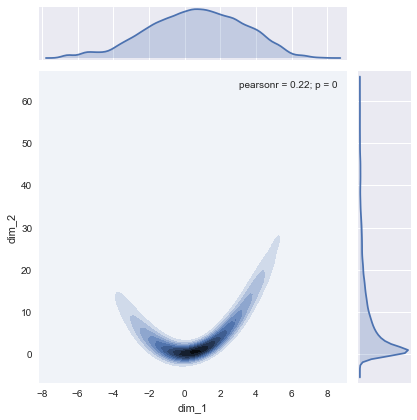

In [15]:
chain = sampler.history.get_flat('chain')
try:
    print sampler.auto_corr()
except AutocorrError, err:
    print err

x, y = ['dim_1', 'dim_2']
df = DataFrame(np.vstack([chain[::100, 0], chain[::100, 1]]).T, columns=[x, y])
sns.jointplot(x=x, y=y, data=df, kind='kde')

#### "pCN" without ensemble, beta=0.4  

In [16]:
proposal = PCNWalkMove(s=None, beta=0.4)
sampler = Sampler(dim=dim, t_dist=t_dist, proposal=proposal, nwalkers=nwalkers)
sampler.run_mcmc(niters, p0=np.random.randn(dim*nwalkers).reshape([nwalkers, dim]), batch_size=batch_size, store=True)

[ 28.25297541  21.03365681]


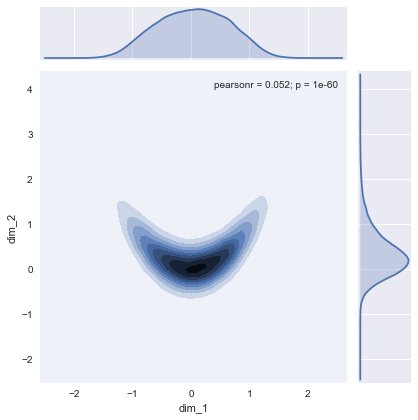

In [17]:
chain = sampler.history.get_flat('chain')
try:
    print sampler.auto_corr()
except AutocorrError, err:
    print err

x, y = ['dim_1', 'dim_2']
df = DataFrame(np.vstack([chain[::100, 0], chain[::100, 1]]).T, columns=[x, y])
sns.jointplot(x=x, y=y, data=df, kind='kde')